In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
start = '2015-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo', start ,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.951864
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714510
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018257
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020527
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357342


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [9]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.951864
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714510
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018257
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020527
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357342


In [10]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0


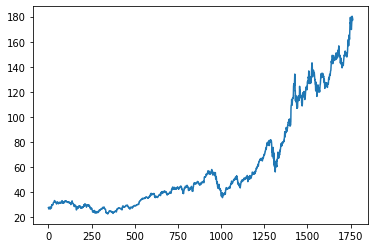

In [11]:
plt.plot(df.Close)

In [12]:
df

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0
...,...,...,...,...,...
1759,180.419998,177.070007,177.089996,180.330002,74919600.0
1760,181.330002,178.529999,180.160004,179.289993,79144300.0
1761,180.630005,178.139999,179.330002,179.380005,62348900.0
1762,180.570007,178.089996,179.470001,178.199997,59773000.0


In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1759    153.3444
1760    153.6667
1761    153.9991
1762    154.3202
1763    154.6399
Name: Close, Length: 1764, dtype: float64

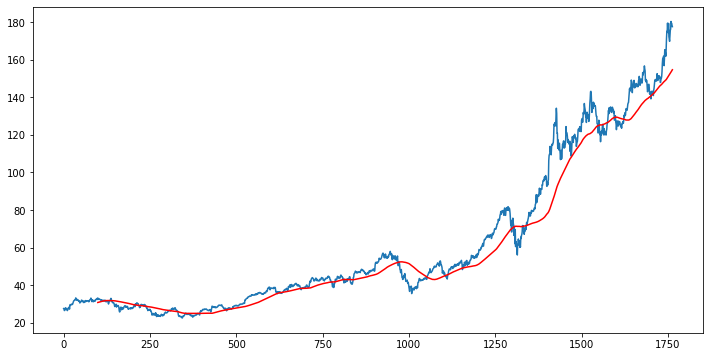

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1759    142.85570
1760    143.13220
1761    143.40125
1762    143.66845
1763    143.95365
Name: Close, Length: 1764, dtype: float64

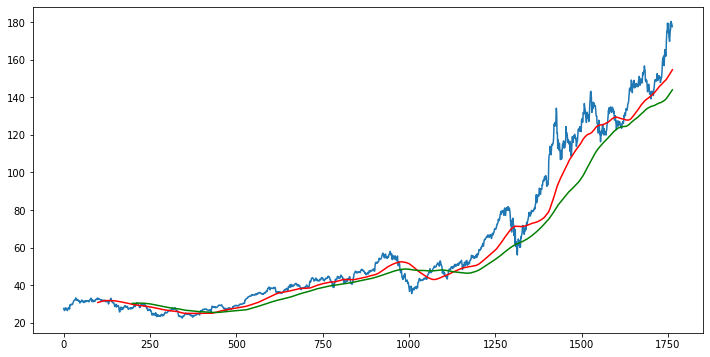

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
df.shape

(1764, 5)

In [19]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(1234, 1)
(530, 1)


In [20]:
data_training.head()

,Close
0,27.594999
1,27.332500
2,26.562500
3,26.565001
4,26.937500


In [21]:
data_testing.head()

,Close
1234,66.592499
1235,66.072502
1236,66.959999
1237,66.812500
1238,66.040001


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.11337407],
       [0.10743383],
       [0.09000907],
       ...,
       [0.97787959],
       [0.97120391],
       [0.96990265]])

In [25]:
data_training_array.shape

(1234, 1)

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape

(1134, 100, 1)

In [28]:
#ML Model

In [32]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [38]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
36/36 [==============================] - 22s 401ms/step - loss: 0.0588
Epoch 2/50
36/36 [==============================] - 13s 369ms/step - loss: 0.0112
Epoch 3/50
36/36 [==============================] - 14s 377ms/step - loss: 0.0090
Epoch 4/50
36/36 [==============================] - 14s 378ms/step - loss: 0.0075
Epoch 5/50
36/36 [==============================] - 14s 376ms/step - loss: 0.0074
Epoch 6/50
36/36 [==============================] - 13s 373ms/step - loss: 0.0070
Epoch 7/50
36/36 [==============================] - 14s 376ms/step - loss: 0.0063
Epoch 8/50
36/36 [==============================] - 14s 378ms/step - loss: 0.0059
Epoch 9/50
36/36 [==============================] - 13s 370ms/step - loss: 0.0056
Epoch 10/50
36/36 [==============================] - 13s 370ms/step - loss: 0.0073
Epoch 11/50
36/36 [==============================] - 14s 378ms/step - loss: 0.0054
Epoch 12/50
36/36 [==============================] - 13s 375ms/step - loss: 0.0054
Epoch 13/50
3

In [39]:
model.save('keras_model.h5')

In [40]:
data_testing.head()

,Close
1234,66.592499
1235,66.072502
1236,66.959999
1237,66.812500
1238,66.040001


In [41]:
data_training.tail(100)

,Close
1134,51.057499
1135,50.005001
1136,50.310001
1137,50.807499
1138,50.437500
...,...
1229,66.775002
1230,66.572502
1231,65.797501
1232,65.502502


In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Rajiv Ishrani\AppData\Local\Temp\ipykernel_12384\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [44]:
final_df.head()

,Close
0,51.057499
1,50.005001
2,50.310001
3,50.807499
4,50.437500


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02062578],
       [0.01265201],
       [0.01496271],
       [0.01873177],
       [0.01592864],
       [0.01886436],
       [0.02248193],
       [0.02113717],
       [0.01895907],
       [0.02333423],
       [0.0175196 ],
       [0.02628888],
       [0.02935717],
       [0.02903519],
       [0.02591009],
       [0.02727378],
       [0.03094813],
       [0.02924354],
       [0.03731201],
       [0.02858062],
       [0.02022805],
       [0.        ],
       [0.00693209],
       [0.01079586],
       [0.01911057],
       [0.0144892 ],
       [0.01352324],
       [0.0296034 ],
       [0.01782265],
       [0.01590971],
       [0.02492519],
       [0.03221715],
       [0.03223608],
       [0.03655442],
       [0.03621351],
       [0.01761431],
       [0.02490626],
       [0.02049321],
       [0.023088  ],
       [0.02967915],
       [0.02916779],
       [0.02340998],
       [0.03002009],
       [0.03776659],
       [0.0377287 ],
       [0.03945225],
       [0.0442441 ],
       [0.057

In [46]:
input_data.shape

(630, 1)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(530, 100, 1)
(530,)


In [51]:
#Making Predictions

y_predicted = model.predict(x_test)

In [52]:
y_predicted.shape

(530, 1)

In [53]:
y_test

array([0.13831963, 0.13438011, 0.14110383, 0.13998637, 0.13413388,
       0.1252131 , 0.12955035, 0.13682334, 0.14653963, 0.13936137,
       0.14231602, 0.14665327, 0.14796014, 0.15494904, 0.16386982,
       0.16491156, 0.16364255, 0.16417287, 0.16307437, 0.17171105,
       0.17222242, 0.18290467, 0.18269629, 0.185954  , 0.18998825,
       0.20267815, 0.19714761, 0.20163641, 0.1989659 , 0.20805713,
       0.22025457, 0.22158034, 0.23413764, 0.22603128, 0.22349331,
       0.23087994, 0.23749008, 0.23339901, 0.23553925, 0.23843708,
       0.23669457, 0.21896665, 0.23552029, 0.24811545, 0.24722527,
       0.22002729, 0.21841737, 0.23771735, 0.24264179, 0.24976323,
       0.23995227, 0.24283115, 0.23915676, 0.25353236, 0.24911928,
       0.24927083, 0.23800144, 0.24675176, 0.24046363, 0.22673205,
       0.19856812, 0.17943859, 0.18809424, 0.1518618 , 0.15155875,
       0.19976135, 0.18178721, 0.2072048 , 0.18860566, 0.18123793,
       0.13794086, 0.17424902, 0.15547936, 0.10396227, 0.16029

In [54]:
y_predicted

array([[0.16170573],
       [0.16135985],
       [0.16090384],
       [0.16049978],
       [0.160279  ],
       [0.16025701],
       [0.16029017],
       [0.16025776],
       [0.16015148],
       [0.16011107],
       [0.16021939],
       [0.16052552],
       [0.16106784],
       [0.16185209],
       [0.16288774],
       [0.16421166],
       [0.16581634],
       [0.1676132 ],
       [0.16945937],
       [0.17118329],
       [0.17269602],
       [0.17395863],
       [0.17502579],
       [0.17594896],
       [0.17681289],
       [0.1777603 ],
       [0.17893027],
       [0.18039043],
       [0.18215974],
       [0.18409139],
       [0.1860891 ],
       [0.18816628],
       [0.19034895],
       [0.19270098],
       [0.19521913],
       [0.19777746],
       [0.20026605],
       [0.20267373],
       [0.20500337],
       [0.20712137],
       [0.2089456 ],
       [0.21041538],
       [0.2112942 ],
       [0.21153969],
       [0.21142381],
       [0.2112814 ],
       [0.21108101],
       [0.210

In [55]:
scaler.scale_

array([0.00757604])

In [56]:
scale_factor = 1/0.00757604
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

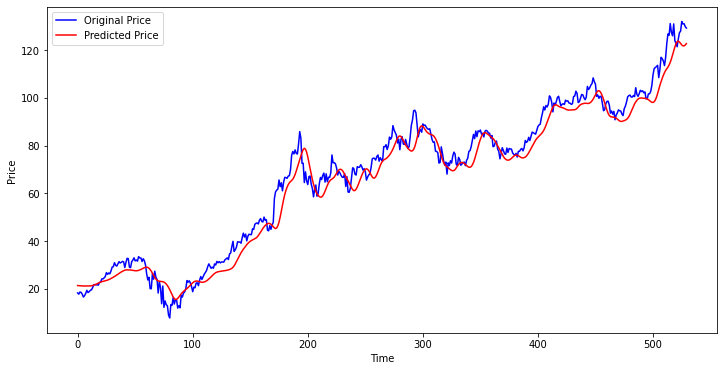

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()